In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

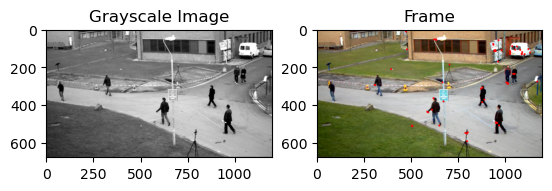

In [9]:
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=3, blockSize=3)
lk_params = dict(winSize=(15, 15), maxLevel=4, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = np.random.randint(0, 255, (100, 3))

# Find Point
Imgframe = cv2.imread(r'C:\Users\****\Desktop\WalkingMotionFrame.png')
gray_f = cv2.cvtColor(Imgframe, cv2.COLOR_BGR2GRAY)

ptcorner = cv2.goodFeaturesToTrack(gray_f, mask=None, **feature_params)
ptcorner = np.intp(ptcorner)

for i in ptcorner:
    x, y = i.ravel()
    cv2.circle(Imgframe, (x, y), 5, (0, 0, 255), -1)

plt.subplot(121), plt.imshow(gray_f, cmap='gray'), plt.title("Grayscale Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(Imgframe, cv2.COLOR_BGR2RGB)), plt.title("Frame")
plt.show()

# Show Track
cap = cv2.VideoCapture(r'C:\Users\****\Desktop\WalkingMotion.mp4')
ret, first_frame = cap.read()
old_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
mask = np.zeros_like(first_frame)

while (cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()

        # Convert points to integers
        a, b, c, d = int(a), int(b), int(c), int(d)

        # Use modulus to cycle through colors
        color_idx = i % len(color)

        mask = cv2.line(mask, (a, b), (c, d), color[color_idx].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 3, color[color_idx].tolist(), -1)

    img = cv2.add(frame, mask)

    cv2.imshow("sparse optical flow", img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()
cap.release()